Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
Разделите данные на выборку для обучения и тестирования
Постройте модель LDA
Визуализируйте предсказания для тестовой выборки и центры классов
Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [52]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [57]:
#cmap = colors.LinearSegmentedColormap(
#    'red_blue_classes',
#    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
#     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
#     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
#plt.cm.register_cmap(cmap=cmap)

In [4]:
iris = load_iris()


In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [93]:
#в наш датафрейм из датасета iris данные и названия столбцов, формируем датафрейм data_2 из двух столбцов исходного датафрейма
# указываем целевую переменную variety
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_2 = data[['sepal length (cm)', 'sepal width (cm)']]
variety = iris.target
data_2

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [28]:
#размечаем данные на тренировочную и тестовую выборку, ч берем из data_2, у - из  variety
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_2, variety, test_size=0.25)

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [30]:
#формируем модель LDA
lda = LinearDiscriminantAnalysis()

In [31]:
#обучаем
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [95]:
#предсказания
lda.predict(X_test)

array([0, 1, 2, 0, 2, 1, 1, 0, 2, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 1,
       0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0])

In [94]:
#итог: слева реальные данные, справа предсказания
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,2,1
2,2,2
3,0,0
4,1,2
5,1,1
6,2,1
7,0,0
8,2,2
9,0,0


In [34]:
from sklearn.metrics import accuracy_score

In [96]:
#точность = 0,78, неплохо
accuracy_score(y_test, lda.predict(X_test))

0.7894736842105263

In [36]:
#коэффициенты для линейной функции
lda.coef_

array([[-6.33965072,  8.03782017],
       [ 1.51686543, -3.62810565],
       [ 4.28236904, -3.6796733 ]])

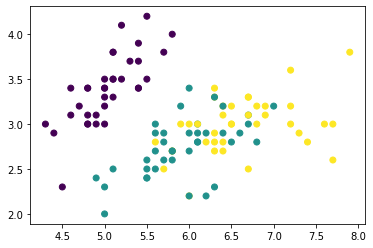

In [97]:
#Точечная диаграмма - Цвет -разделение на классы(variety), по х - 'sepal length (cm)', по у -sepal width (cm)
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

In [99]:
#Центры кластеров - центроиды, далее обозначены на диаграмме крестиком Х
lda.means_

array([[5.03428571, 3.39428571],
       [5.93076923, 2.74358974],
       [6.60789474, 2.98421053]])

In [50]:
lda.means_[:, 0]

array([5.03428571, 5.93076923, 6.60789474])

In [51]:
lda.means_[:, 1]

array([3.39428571, 2.74358974, 2.98421053])

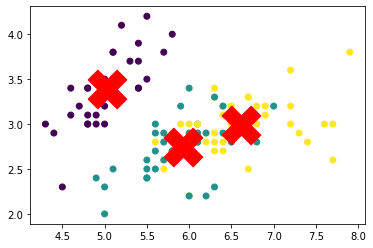

In [100]:
# сам scatter plot
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='red', s=1500, marker='X')

In [105]:
#Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
x = data['sepal length (cm)']
y = data['sepal width (cm)']
#вместе это и есть data_2
data_2

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


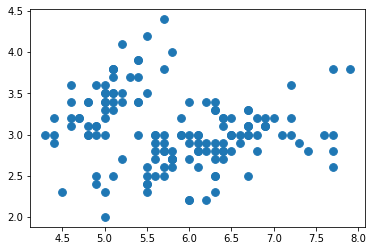

In [103]:
plt.scatter(x, y, cmap='autumn', s=60)

In [79]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()

In [109]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(data_2)
X_scaled

array([[-0.90068117,  1.01900435],
       [-1.14301691, -0.13197948],
       [-1.38535265,  0.32841405],
       [-1.50652052,  0.09821729],
       [-1.02184904,  1.24920112],
       [-0.53717756,  1.93979142],
       [-1.50652052,  0.78880759],
       [-1.02184904,  0.78880759],
       [-1.74885626, -0.36217625],
       [-1.14301691,  0.09821729],
       [-0.53717756,  1.47939788],
       [-1.26418478,  0.78880759],
       [-1.26418478, -0.13197948],
       [-1.87002413, -0.13197948],
       [-0.05250608,  2.16998818],
       [-0.17367395,  3.09077525],
       [-0.53717756,  1.93979142],
       [-0.90068117,  1.01900435],
       [-0.17367395,  1.70959465],
       [-0.90068117,  1.70959465],
       [-0.53717756,  0.78880759],
       [-0.90068117,  1.47939788],
       [-1.50652052,  1.24920112],
       [-0.90068117,  0.55861082],
       [-1.26418478,  0.78880759],
       [-1.02184904, -0.13197948],
       [-1.02184904,  0.78880759],
       [-0.7795133 ,  1.01900435],
       [-0.7795133 ,

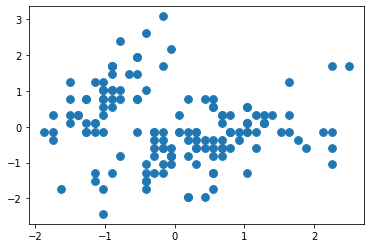

In [108]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [75]:
from sklearn.cluster import KMeans

In [110]:
# явно указываем количество кластеров, далее из графика локтя видно, что оптимально 2-3 кластера
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

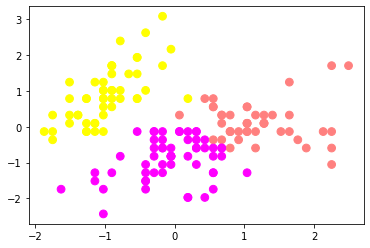

In [114]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='spring', c=clusters, s=60)

In [115]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

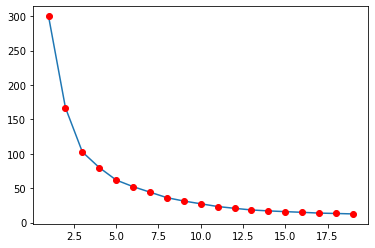

In [117]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
#из графика локтя видно, что оптимально 2-3 кластера

In [118]:
#Альтернативный метод
from sklearn.cluster import AgglomerativeClustering

In [119]:
aglo = AgglomerativeClustering(n_clusters=3)
clusters = aglo.fit_predict(X_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

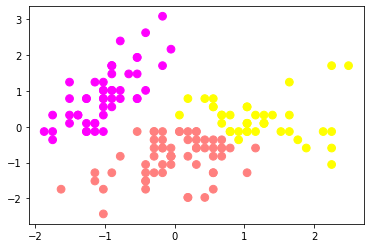

In [121]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='spring', c=clusters, s=60)